<a href="https://colab.research.google.com/github/JavierPachas/generative_ai/blob/main/04_inpaint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text-guided image-inpainting

The [StableDiffusionInpaintPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/stable_diffusion/inpaint#diffusers.StableDiffusionInpaintPipeline) allows you to edit specific parts of an image by providing a mask and a text prompt. It uses a version of Stable Diffusion, like [`runwayml/stable-diffusion-inpainting`](https://huggingface.co/runwayml/stable-diffusion-inpainting) specifically trained for inpainting tasks.

Get started by loading an instance of the [StableDiffusionInpaintPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/stable_diffusion/inpaint#diffusers.StableDiffusionInpaintPipeline):

In [ ]:
!pip install diffusers transformers ftfy accelerate

import PIL
import torch
from io import BytesIO
from diffusers.utils import load_image, make_image_grid
import matplotlib.pyplot as plt
from diffusers import StableDiffusionInpaintPipeline

In [2]:


pipeline = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    torch_dtype=torch.float16,
)
pipeline = pipeline.to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors not found


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.78k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/748 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

(-0.5, 4499.5, 3374.5, -0.5)

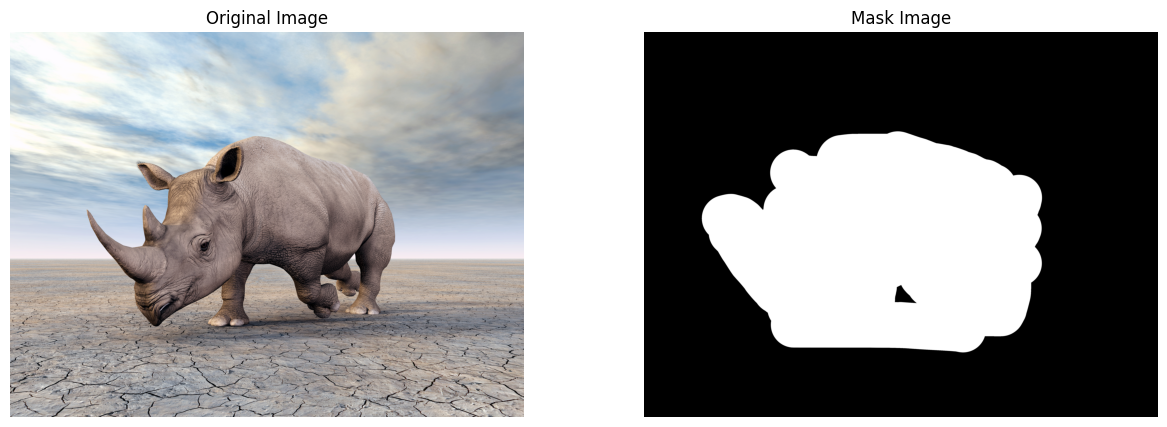

In [3]:
init_image =  load_image("/content/Rhinoceros_LIL_53344.jpeg")
mask_image =  load_image("/content/Rhinoceros_LIL_53344_mask.png")

# Plotting the images
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(init_image)
axes[0].set_title('Original Image')
axes[0].axis('off')  # Turn off axis

axes[1].imshow(mask_image)
axes[1].set_title('Mask Image')
axes[1].axis('off')

Now you can create a prompt to replace the mask with something else:

  0%|          | 0/50 [00:00<?, ?it/s]

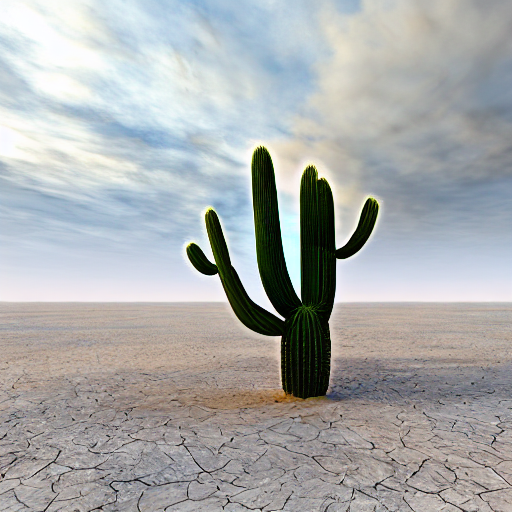

In [4]:
prompt = "cactus in the desert, realistic"
image = pipeline(prompt=prompt, image=init_image, mask_image=mask_image).images[0]
image

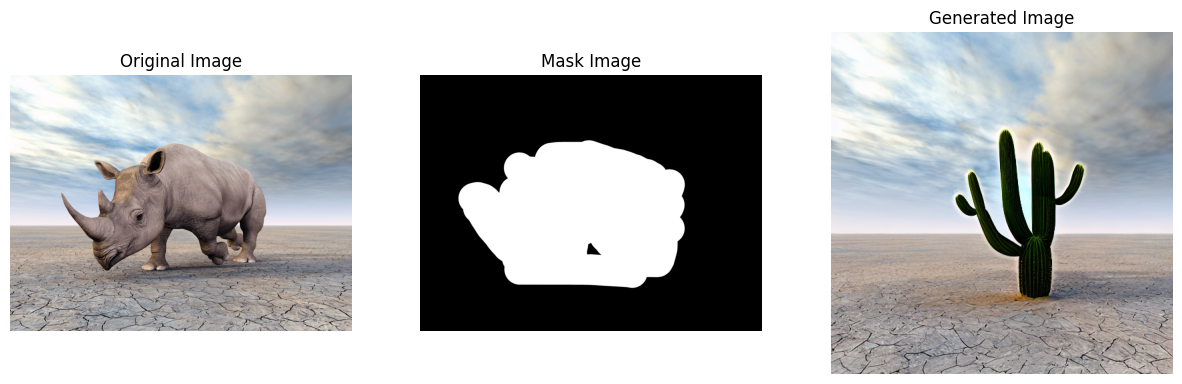

In [5]:


# Plotting the images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns
axes[0].imshow(init_image)
axes[0].set_title('Original Image')
axes[0].axis('off')  # Turn off axis

axes[1].imshow(mask_image)
axes[1].set_title('Mask Image')
axes[1].axis('off')

axes[2].imshow(image)
axes[2].set_title('Generated Image')
axes[2].axis('off')

plt.show()

(-0.5, 4499.5, 3374.5, -0.5)

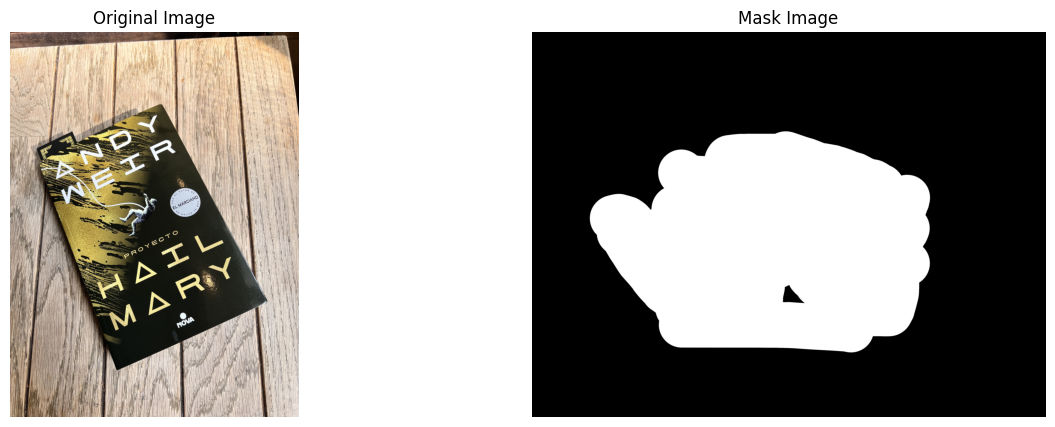

In [7]:
init_image =  load_image("/content/book.jpg")
mask_image =  load_image("/content/Rhinoceros_LIL_53344_mask.png")

# Plotting the images
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(init_image)
axes[0].set_title('Original Image')
axes[0].axis('off')  # Turn off axis

axes[1].imshow(mask_image)
axes[1].set_title('Mask Image')
axes[1].axis('off')

  0%|          | 0/50 [00:00<?, ?it/s]

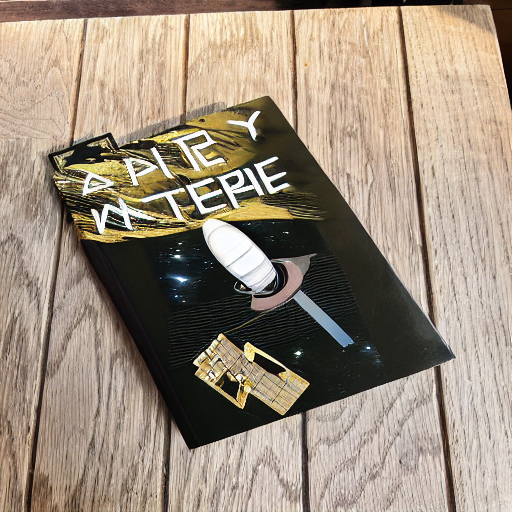

In [11]:
prompt = "spacecraft in the book's cover on the table, realistic"
image = pipeline(prompt=prompt, image=init_image, mask_image=mask_image).images[0]
image

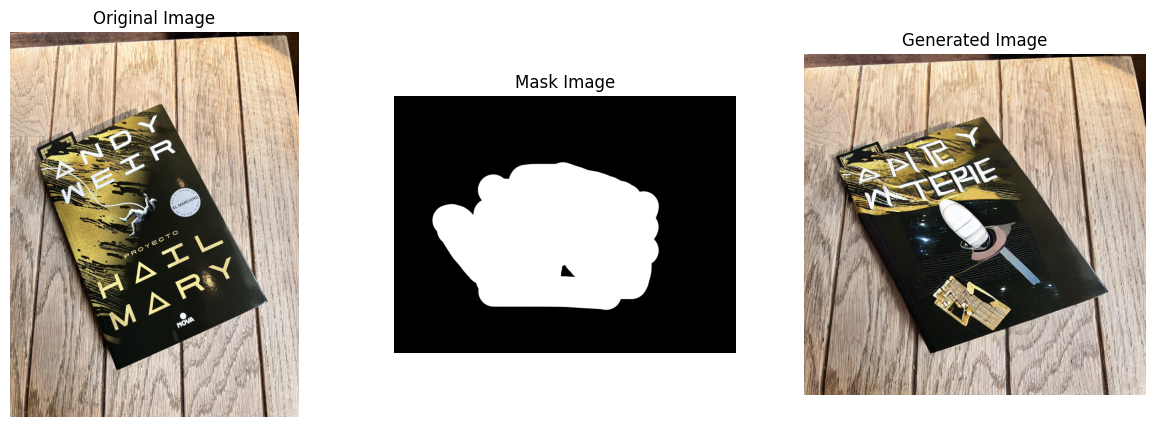

In [12]:
# Plotting the images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns
axes[0].imshow(init_image)
axes[0].set_title('Original Image')
axes[0].axis('off')  # Turn off axis

axes[1].imshow(mask_image)
axes[1].set_title('Mask Image')
axes[1].axis('off')

axes[2].imshow(image)
axes[2].set_title('Generated Image')
axes[2].axis('off')

plt.show()